In [2]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
%matplotlib inline

Matplotlib created a temporary config/cache directory at /var/folders/rf/wfq6hz5s56g3yh4wqgd7820c0000gn/T/matplotlib-m_tako0x because the default path (/Users/nreilly/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [34]:
data = [] 
with open('../output_results.txt') as f:
    for line in f:
        data.append(line.strip().split(','))
        
# Converts testbench data to ints
data = [data[0]] + [[int(j) for j in i] for i in data[1:]]

In [35]:
df = pd.DataFrame(data[1:], columns=data[0])
df

,addr_tb,data_tb
0,0,0
1,1,0
2,2,0
3,3,0
4,4,3
...,...,...
499995,8475,-219
499996,8476,-222
499997,8477,-222
499998,8478,-222


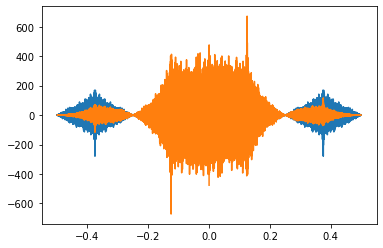

In [49]:
import matplotlib.pyplot as plt
t = df['data_tb'][:(4*4096)]
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()



/Users/nreilly/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

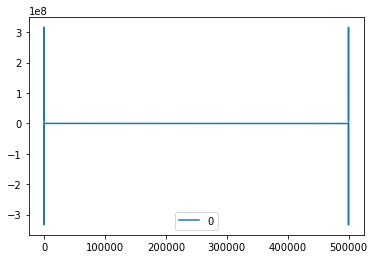

In [46]:
fft_data = np.fft.fft(df['data_tb'])

pd.DataFrame(fft_data).plot()

In [20]:
print(pd.__version__)

1.2.4
